1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

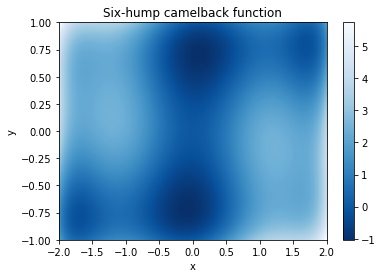

Minima are:
f([-0.08984202  0.7126564 ]) = -1.031628453489877
f([ 0.08984201 -0.71265641]) = -1.0316284534898765

Starting from (0, 0) the result is:
f([0. 0.]) = 0.0
This result is clearly wrong


In [1]:
import scipy.optimize as opt
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

def function(x_0):
    [x, y] = x_0
    return (4-2.1*(x**2)+(x**4)/3)*(x**2)+x*y+(4*(y**2)-4)*(y**2)


x = np.linspace(-2, 2, 100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)

f_xy = function((x,y))

fig, ax = plt.subplots()
pos = ax.imshow(f_xy,  extent=[-2,2,-1,1], cmap='Blues_r',aspect='auto')
fig.colorbar(pos, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Six-hump camelback function')
plt.show()

starting_points = [(-2,1),(2,-1)]

print('Minima are:')
for point in starting_points:
    sol = opt.minimize(function, point)
    if sol.success:
        print('f('+str(sol.x)+') =', function(sol.x))

print('\nStarting from (0, 0) the result is:')
sol = opt.minimize(function, (0,0))
if sol.success:
    print('f('+str(sol.x)+') =', function(sol.x))
print('This result is clearly wrong')

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

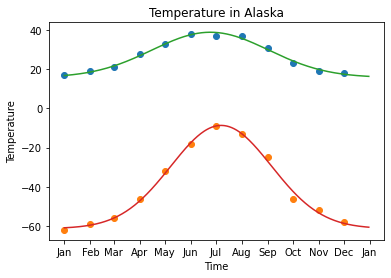

A gaussian funcion can definitly well fit data, however we know that temperature is a sort of periodic function, so we can say for sure that this function will not fit well outside the boundary of the figure.
One simple solution could be making a periodic gaussian with period 12.


In [2]:
import pandas as pd
t_max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
t_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, ax = plt.subplots()
dates= pd.date_range('2021-01-01','2022-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
dates_prime = []
for d in dates:
    delta = d - dates[0]
    dates_prime += [delta.days +1, ]
ax.plot(dates, t_max, 'o')
ax.plot(dates, t_min, 'o')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature in Alaska')

locator = mdates.MonthLocator()  
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)

def gaussian(x, scale, mean ,sigma, floor):
    return scale*np.exp(-((x-mean)**2/(sigma**2)))+floor

max_fit = opt.curve_fit(gaussian, np.arange(12), t_max, p0 = [10, 6.5, 10, 17],full_output=False, maxfev=1000000)
min_fit = opt.curve_fit(gaussian, np.arange(12), t_min, p0 = [2, 6.5, 2, -100], full_output=False, maxfev=1000000)
dates= pd.date_range('2021-01-01','2021-12-31' , freq='1d')
ax.plot(dates, gaussian(12*np.arange(len(dates))/len(dates), (max_fit[0])[0], (max_fit[0])[1],(max_fit[0])[2],(max_fit[0])[3]))
ax.plot(dates, gaussian(12*np.arange(len(dates))/len(dates), (min_fit[0])[0], (min_fit[0])[1],(min_fit[0])[2],(min_fit[0])[3]))
plt.show()
print('A gaussian funcion can definitly well fit data, however we know that temperature is a sort of periodic function, so we can say for sure that this function will not fit well outside the boundary of the figure.\nOne simple solution could be making a periodic gaussian with period 12.')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

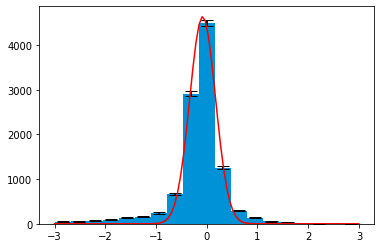

n degrees of freedom = 18
chi2 = 16635.309508686372
p-value = 0.0


In [27]:
import pickle
filename = 'data/residuals_261.pkl'

# INSPECT
s = open(filename, 'rb')
new_dict = pickle.load(s)
s.close()
#print(new_dict)

# DATAFRAME
a = np.load(filename, allow_pickle=True).item()
df = pd.DataFrame(a)
data = df['residuals']
fig, ax = plt.subplots()
y, binEdges, _ = ax.hist(data, bins= np.linspace(-3, 3, 20), color='#0092d6')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
yerr= np.sqrt(np.abs(y))
ax.errorbar(bincenters, y, yerr, fmt='none',c='black', linewidth=2, capsize=6)
def gaussian_(x, scale, mean ,sigma):
    return scale*np.exp(-((x-mean)**2/(sigma**2)))
fit = opt.curve_fit(gaussian_, bincenters, y, p0 = [5000, 0, 1],full_output=False, maxfev=1000000)
ax.plot(np.linspace(binEdges[0], binEdges[-1], 100), gaussian_(np.linspace(binEdges[0], binEdges[-1], 100), (fit[0])[0], (fit[0])[1],(fit[0])[2]), 'r')
plt.show()

ndof = len(bincenters) - 1
print("n degrees of freedom =", ndof)
chi2 = np.sum(((y - gaussian_(bincenters, (fit[0])[0], (fit[0])[1],(fit[0])[2]))**2) / yerr)
print("chi2 =", chi2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) 

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

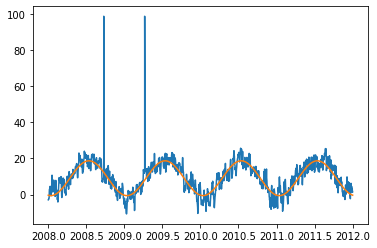

Best fit values:
f(x) = -9.67 cos(2 π x -0.224) + 9.05

Overall average temperature = 8.941907038598593
Coldest prediction = -0.6187145773109766
Hottest prediction = 18.723838748523548

Parameter b is the initial phase, it shift the cosine horizontally, not modifying the period of the cosine

Fisher test:
CL: 0.634 , additional parameter necessary: NO


In [4]:
from scipy.stats import f

data = pd.read_csv('data\munich_temperatures_average_with_bad_data.txt', header=None, sep=' ', names=['Year', 'Temperature'])
fid, ax = plt.subplots()
ax.plot('Year', 'Temperature', data= data[(data['Year']>2008) & (data['Year']<2012)])

def cosine(x,a,b,c):
    return a*np.cos(2*np.pi*x +b)+c

fit, cov = opt.curve_fit(cosine, data['Year'], data['Temperature'], p0 = [30, 0, 10],full_output=False)
data['Interpolation 1']=cosine(data['Year'],fit[0], fit[1], fit[2])
ax.plot('Year', 'Interpolation 1', data= data[(data['Year']>2008) & (data['Year']<2012)])
plt.show()

print('Best fit values:\nf(x) = {:.3} cos(2 \u03C0 x {:.3}) + {:.3}\n'.format(fit[0], fit[1], fit[2]))
print('Overall average temperature =', data['Temperature'].mean())
print('Coldest prediction =', fit[2] + fit[0])
print('Hottest prediction =', fit[2] - fit[0])
print('\nParameter b is the initial phase, it shift the cosine horizontally, not modifying the period of the cosine')

def cosine_(x,a,b,c,d):
    return a*np.cos(2*np.pi*x*b +c)+d

fit, cov = opt.curve_fit(cosine_, data['Year'], data['Temperature'], p0 = [-10, 1, 0, 9],full_output=False)
data['Interpolation 2']=cosine_(data['Year'],fit[0], fit[1], fit[2], fit[3])

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

ssr_1 = np.sum((data['Temperature']-data['Interpolation 1'])**2)
ssr_2 = np.sum((data['Temperature']-data['Interpolation 2'])**2)
print('\nFisher test:')
cl = Ftest(ssr_1, ssr_2, 3, 4, len(data.index), verbose=True)